In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('../../../')

In [3]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

In [4]:
os.getcwd()

'/Users/gbemidebe/Documents/GitHub/monsur'

In [5]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

# The Data

In [6]:
data = pd.read_csv('./data/cleaned_data.csv')
# data = data.drop(columns=['S/N'])
data

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,1,150,3.5,1.00,14.05,118.71000,0.00,0.00,0.23,0.12,0.00,0.61
1,2,150,3.3,0.80,14.05,107.67720,0.20,0.00,0.23,0.07,0.00,0.66
2,3,150,3.2,0.50,14.05,91.12800,0.50,0.00,0.34,0.05,0.03,0.52
3,4,150,3.1,0.10,14.05,69.06240,0.90,0.01,0.42,0.05,0.02,0.42
4,5,150,3.0,0.05,14.05,66.30420,0.95,0.04,0.48,0.05,0.10,0.19
5,6,150,3.0,0.03,14.05,65.20092,0.97,0.07,0.50,0.05,0.11,0.14
6,7,150,2.8,0.00,14.05,63.54600,1.00,0.15,0.47,0.11,0.06,0.11
7,8,250,4.0,1.00,14.05,118.71000,0.00,0.00,0.22,0.12,0.00,0.63
8,9,250,3.8,0.80,14.05,107.67720,0.20,0.00,0.17,0.10,0.00,0.70
9,10,250,3.7,0.50,14.05,91.12800,0.50,0.02,0.36,0.08,0.02,0.48


In [7]:
features_col = ['S/N', 'cDen', 'Pot', 'Sn %', 'pH', 'weight', 'Cu %']
target_col = ['C2H4', 'CO', 'H2', 'EtoH', 'FORM']

In [8]:
data[features_col[1:]] = data[features_col[1:]] / data[features_col[1:]].max()

In [9]:
data.head()

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,1,0.333333,0.744681,1.00,1.0,1.000000,0.00,0.00,0.23,0.12,0.00,0.61
1,2,0.333333,0.702128,0.80,1.0,0.907061,0.20,0.00,0.23,0.07,0.00,0.66
2,3,0.333333,0.680851,0.50,1.0,0.767652,0.50,0.00,0.34,0.05,0.03,0.52
3,4,0.333333,0.659574,0.10,1.0,0.581774,0.90,0.01,0.42,0.05,0.02,0.42
4,5,0.333333,0.638298,0.05,1.0,0.558539,0.95,0.04,0.48,0.05,0.10,0.19


In [10]:
len(features_col)

7

In [11]:
import math
import numpy as np
import pandas as pd

def equation_1(Cu, weight):
    c0 = 2.423637733748253e-01
    a0 = -3.916827745819957e-01
    return c0 + a0 * (abs((Cu ** 6) - np.cos(weight)))

def equation_2(Cu, weight, Pot, cDen):
    c0 = 3.644724216916952e-01
    a0 = -1.243534781922563e-01
    a1 = -4.630421016569123e-01
    return c0 + a0 * (abs((Pot / weight) - (Cu / cDen))) + a1 * (abs((Cu ** 6) - np.cos(weight)))

def equation_3(Cu, weight, Pot, cDen, Sn):
    c0 = 3.845314600341826e-01
    a0 = -4.198097496313864e-01
    a1 = -1.199276474653009e-01
    a2 = -2.780061105029163e-01
    return c0 + a0 * (abs(np.cbrt(Sn) - (weight ** 2))) + a1 * (abs((Pot / weight) - (Cu / cDen))) + a2 * (abs((Cu ** 6) - np.cbrt(weight)))

def equation_4(Cu, weight, Pot, cDen, Sn, pH):
    c0 = 7.794695588562600e-01
    a0 = -2.343969100382899e-01
    a1 = -1.511699695287577e-01
    a2 = -8.102830014996789e-01
    a3 = -4.363067900795246e-01
    return c0 + a0 * (abs(np.cbrt(Sn) - (weight * cDen))) + a1 * (abs((Cu / cDen) - (weight + cDen))) + a2 * (abs((Cu ** 6) - np.cos(weight))) + a3 * ((Cu ** 3) * (pH * Pot))

def equation_5(Cu, weight, Pot, cDen, Sn):
    c0 = 3.281047382459490e-01
    a0 = 3.582353274493197e-01
    a1 = -4.792365108272099e-01
    a2 = -3.114643670447633e-01
    a3 = -9.722563066177728e-02
    a4 = -2.367335884642759e-01
    return c0 + a0 * (abs((np.exp(-1.0 * Pot)) - (Cu ** 6))) + a1 * (abs(np.cbrt(Sn) - (weight ** 2))) + a2 * (abs(np.cbrt(Sn) - (weight * cDen))) + a3 * (abs((Pot + cDen) - (Cu / cDen))) + a4 * (abs((Cu ** 6) - Pot))

def equation_6(Cu, weight, Pot, cDen, Sn, pH):
    c0 = 2.801280473445035e-01
    a0 = 3.516697023069468e-01
    a1 = 3.687251845185032e-01
    a2 = -5.970932191479567e-01
    a3 = -7.073091663701121e-01
    a4 = -1.018106173107204e-01
    a5 = -2.343047991878564e-01
    return c0 + a0 * ((abs(Sn - cDen)) * (abs(Cu - cDen))) + a1 * (abs((np.exp(-1.0 * Pot)) - (Cu ** 6))) + a2 * (abs(np.cbrt(Sn) - (weight ** 2))) + a3 * (abs((cDen / Pot) - (pH * Pot))) + a4 * (abs((Cu / cDen) - (weight + Pot))) + a5 * (abs((Cu ** 6) - Pot))

In [12]:
data['EtoH_pred_1'] = equation_1(data['Cu %'], data['weight'])
data['EtoH_pred_2'] = equation_2(data['Cu %'], data['weight'], data['Pot'], data['cDen'])
data['EtoH_pred_3'] = equation_3(data['Cu %'], data['weight'], data['Pot'], data['cDen'], data['Sn %'])
data['EtoH_pred_4'] = equation_4(data['Cu %'], data['weight'], data['Pot'], data['cDen'], data['Sn %'], data['pH'])
data['EtoH_pred_5'] = equation_5(data['Cu %'], data['weight'], data['Pot'], data['cDen'], data['Sn %'])
data['EtoH_pred_6'] = equation_6(data['Cu %'], data['weight'], data['Pot'], data['cDen'], data['Sn %'], data['pH'])

In [13]:
def percentage_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)) * 100

In [14]:
from src.plotter import plot_data

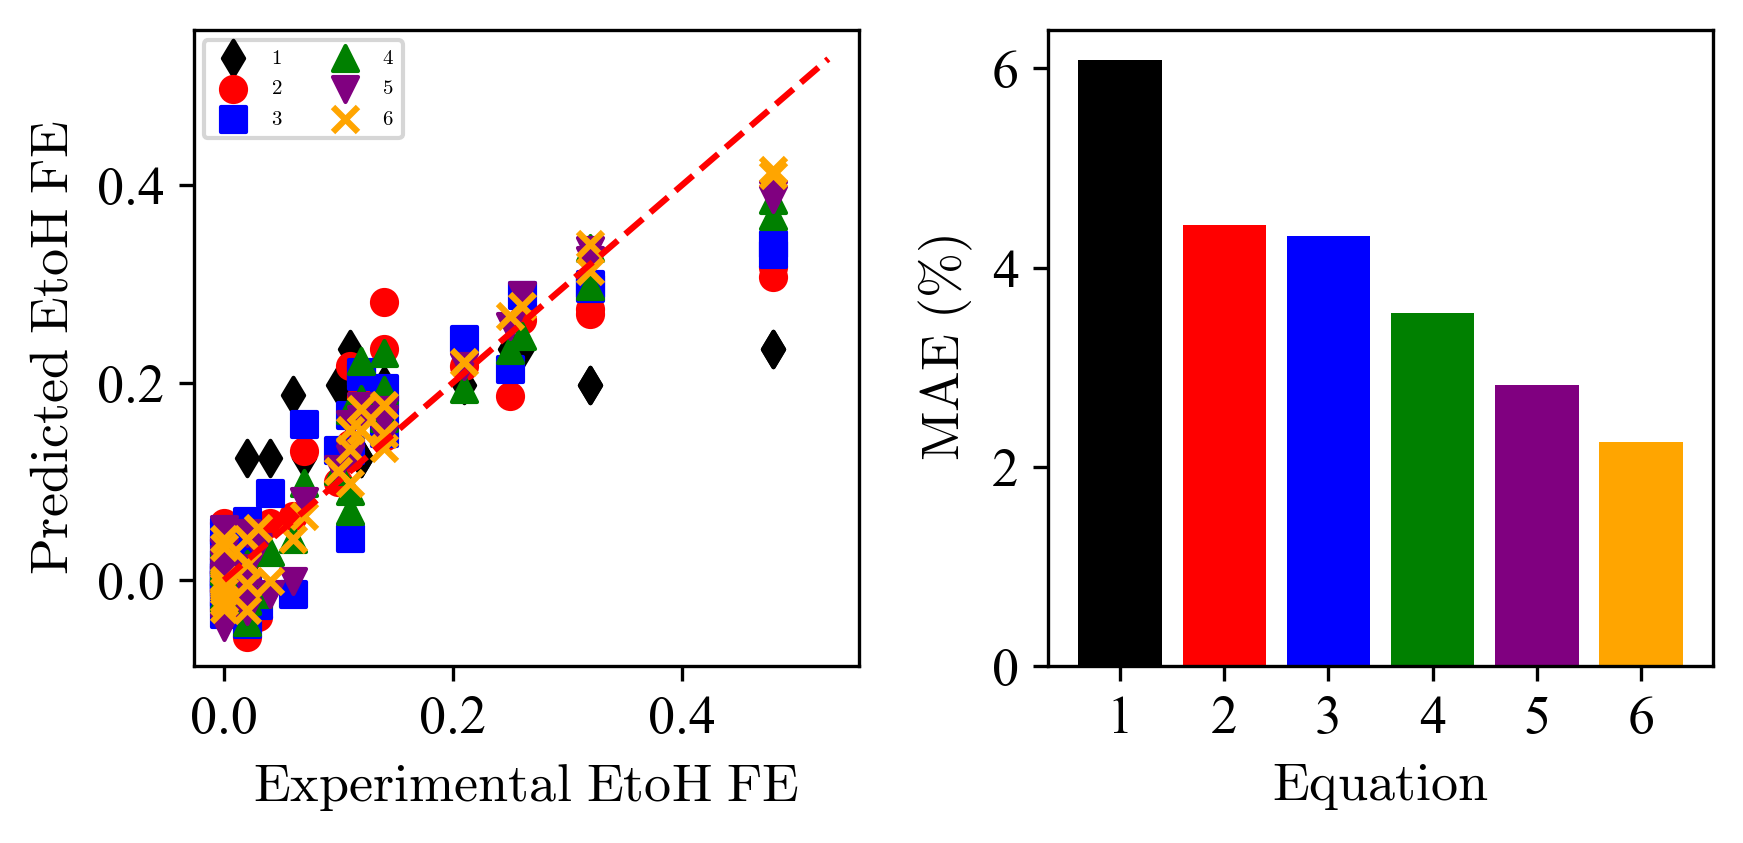

In [15]:
plot_data(data, metric=percentage_mae, metric_name='MAE', name='EtoH', pred_name='EtoH_pred', title='EtoH', figsize=(6, 4))

Text(0, 0.5, '$\\rm Predicted \\ EtoH \\ FE$')

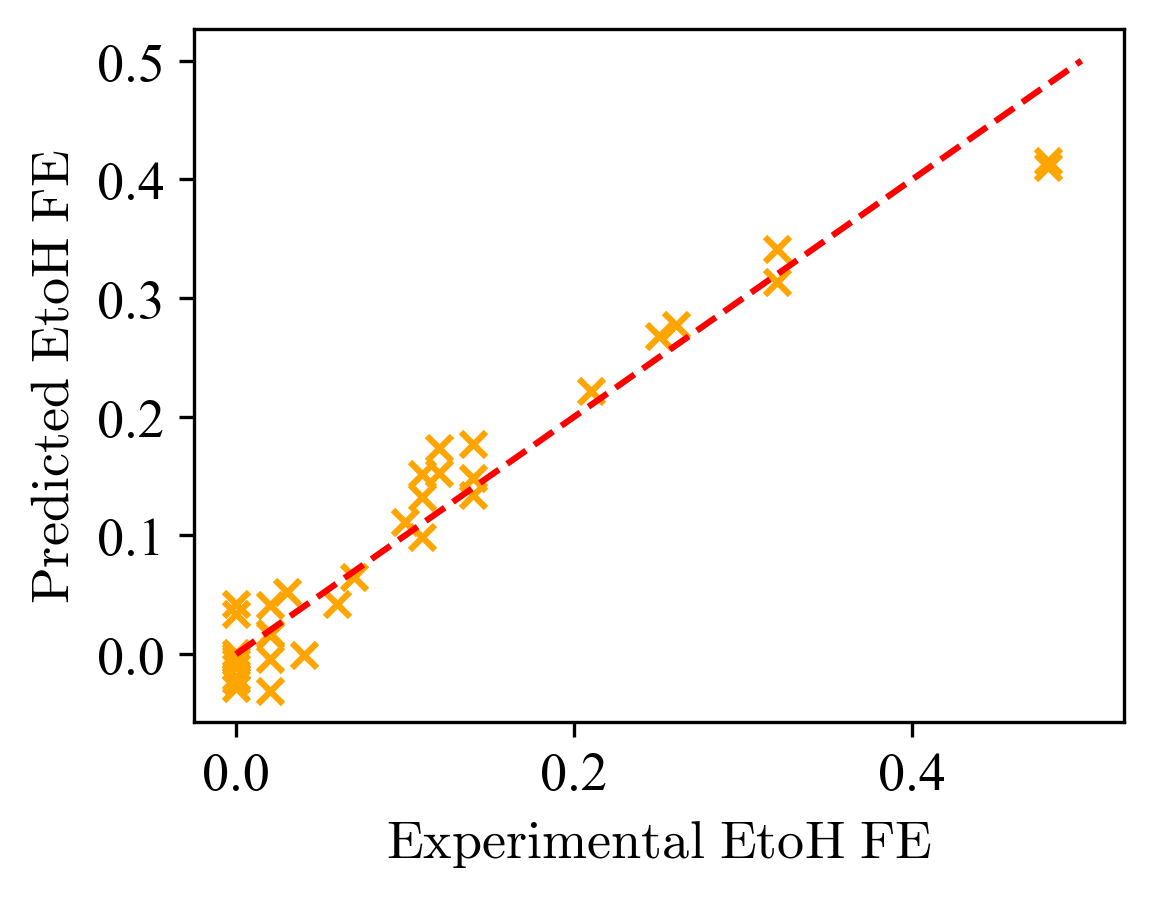

In [16]:
plt.figure(figsize=(4, 3))
plt.scatter(data['EtoH'], data['EtoH_pred_6'], label=r'$\rm Eqn 6$', marker='x', color='orange')
plt.plot([0, 0.5], [0, 0.5], color='red', linestyle='--')

plt.xlabel(r'$\rm Experimental \ EtoH \ FE$')
plt.ylabel(r'$\rm Predicted \ EtoH \ FE$')

# plt.legend()